In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import CSV files into DataFrame Bandas
df1=pd.read_csv('/content/drive/MyDrive/0001Submission/Data/inDataForModels/df_TrainOutFinal.csv')
df2=pd.read_csv('/content/drive/MyDrive/0001Submission/Data/inDataForModels/df_TestOutFinal.csv')

In [ ]:
df1.shape,df2.shape

((7516115, 9), (940628, 9))

In [ ]:
df1.head(5)

,QuestionId,UserId,Gender,Age,GroupId,QuizId,2,3,IsCorrect
0,15911,50013,1,14.0,4975,17226,42.0,211.0,0
1,15911,59114,0,12.0,3874,17226,42.0,211.0,1
2,15911,19121,1,13.0,10399,17226,42.0,211.0,0
3,15911,112781,2,14.0,10035,17226,42.0,211.0,0
4,15911,15277,1,33.0,6005,17226,42.0,211.0,1


In [ ]:


d1=df1.values
d2=df2.values
x_tr=d1[:,0:8]
y_tr=d1[:,8]
x_ts=d2[:,0:8]
y_ts=d2[:,8]

In [ ]:
from sklearn import model_selection
k=7
kfold=model_selection.KFold(n_splits=k)

In [ ]:
cart=DecisionTreeClassifier(max_depth=5)
num_trees=20

In [ ]:
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees, 
                        bootstrap=True,n_jobs=-1)

In [ ]:
results=model_selection.cross_val_score(model,x_tr,y_tr,cv=kfold)

In [ ]:
for i in range(len(results)):
  print("Model "+str(i)+" : Accuracy is: "+str(results[i]))

Model 0 : Accuracy is: 0.6613490716017326
Model 1 : Accuracy is: 0.6624489746500754
Model 2 : Accuracy is: 0.6484510552456807
Model 3 : Accuracy is: 0.658558801040484
Model 4 : Accuracy is: 0.6687689933512211
Model 5 : Accuracy is: 0.6732232497927785
Model 6 : Accuracy is: 0.7001611205796615


In [ ]:
print("Mean Accuracy is: "+ str(results.mean()))
print("Max. Accuracy is: "+ str(results.max()))

Mean Accuracy is: 0.6675658951802335
Max. Accuracy is: 0.7001611205796615


In [ ]:
model.fit(x_tr,y_tr)
predict=model.predict(x_ts)

In [ ]:
nnz=np.shape(y_ts)[0]-np.count_nonzero(predict-y_ts)
acc=100*nnz/np.shape(y_ts)[0]
print("Accuracy is:"+str(acc))

Accuracy is:66.81121548582436


In [ ]:
results

array([0.66134907, 0.66244897, 0.64845106, 0.6585588 , 0.66876899,
       0.67322325, 0.70016112])

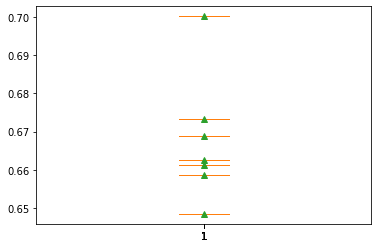

In [ ]:
# plot model performance for comparison
for i in range(len(results)):
  plt.boxplot(results[i], showmeans=True)
plt.show()

In [ ]:
d1=df1.values
d2=df2.values
x_tr=d1[:,0:8]
y_tr=d1[:,8]
x_ts=d2[:,0:8]
y_ts=d2[:,8]

In [ ]:
from sklearn.naive_bayes import GaussianNB
base=GaussianNB()

In [ ]:
model=BaggingClassifier(base_estimator=base,n_estimators=100,max_samples=50,
                        bootstrap=True,n_jobs=-1)

In [ ]:
results2=model_selection.cross_val_score(model,x_tr,y_tr,cv=kfold)








In [ ]:
for i in range(len(results2)):
  print("Model "+str(i)+" : Accuracy is: "+str(results2[i]))

Model 0 : Accuracy is: 0.6609774701484823
Model 1 : Accuracy is: 0.6624880905925227
Model 2 : Accuracy is: 0.6489288285427169
Model 3 : Accuracy is: 0.658558801040484
Model 4 : Accuracy is: 0.6661957231373593
Model 5 : Accuracy is: 0.672807875350414
Model 6 : Accuracy is: 0.7030203123690313


In [ ]:
print("Mean Accuracy is: "+ str(results2.mean()))
print("Max. Accuracy is: "+ str(results2.max()))

Mean Accuracy is: 0.6675681573115729
Max. Accuracy is: 0.7030203123690313


In [ ]:
model.fit(x_tr,y_tr)
predict=model.predict(x_ts)

In [ ]:
nnz=np.shape(y_ts)[0]-np.count_nonzero(predict-y_ts)
acc=100*nnz/np.shape(y_ts)[0]
print("Accuracy is:"+str(acc))

Accuracy is:66.80706931964602


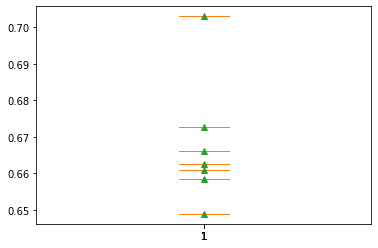

In [ ]:
# plot model performance for comparison
for i in range(len(results2)):
  plt.boxplot(results2[i], showmeans=True)
plt.show()

In [ ]:



results2

array([0.66097747, 0.66248809, 0.64892883, 0.6585588 , 0.66619572,
       0.67280788, 0.70302031])